<a href="https://colab.research.google.com/github/MhT-an/DSA3101-E-commerce-SubGroup-A/blob/main/Q3/Part_2/q3ii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://support.google.com/analytics/answer/3437719?hl=en

## Copy these cells to make your own queries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import os

%matplotlib inline

os.chdir("../")

In [2]:
%run "subgrp_a_q3b_data.py"

c:\Users\user\anaconda3\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning:

BigQuery Storage module not found, fetch data with the REST endpoint instead.



# Creating sales data metrics

# ROI

In [3]:
result = pd.read_parquet('aov_conversion.parquet')
result

,channel,total_users,total_sessions,total_transactions,total_revenue,avg_pageviews,avg_time_on_site,avg_bounces,avg_order_value,conversion_rate
0,(none),275409,371467,9160,1190175.11,4.972398,299.891050,0.417959,129.931781,0.024659
1,organic,195418,234381,2221,204889.05,4.057434,280.767406,0.491546,92.250810,0.009476
2,cpm,4039,6184,150,78268.19,5.466688,301.436945,0.360285,521.787933,0.024256
3,referral,239977,262022,326,40954.76,2.009523,149.724200,0.627192,125.628098,0.001244
4,cpc,9870,13079,248,25176.76,5.551537,299.712199,0.370135,101.519194,0.018962
5,affiliate,13400,16403,9,597.38,2.891104,309.142969,0.530452,66.375556,0.000549
6,(not set),89,117,1,9.99,3.641026,228.774194,0.470085,9.990000,0.008547


# Marketing campaign

In [4]:
result = pd.read_parquet('marketing_metrics.parquet')
result

,campaign,total_users,total_sessions,total_transactions,total_revenue,avg_pageviews,avg_time_on_site,avg_bounces,avg_order_value,conversion_rate
0,AW - Accessories,4042,5327,100,13997.55,5.063826,189.479820,0.354421,139.975500,0.018772
1,(not set),695862,875599,11865,1514688.95,3.840579,130.178788,0.500189,127.660257,0.013551
2,AW - Dynamic Search Ads Whole Site,4921,6213,141,10787.36,6.505553,205.280058,0.326734,76.506099,0.022694
3,Data Share Promo,13399,16403,9,597.38,2.890630,144.741937,0.530513,66.375556,0.000549
4,Data Share,1,1,0,NaN,3.000000,16.000000,0.000000,NaN,0.000000
5,AW - Electronics,31,74,0,NaN,9.310811,324.189189,0.432432,NaN,0.000000
6,All Products,4,4,0,NaN,1.000000,0.000000,1.000000,NaN,0.000000
7,AW - Apparel,28,32,0,NaN,4.812500,170.687500,0.281250,NaN,0.000000


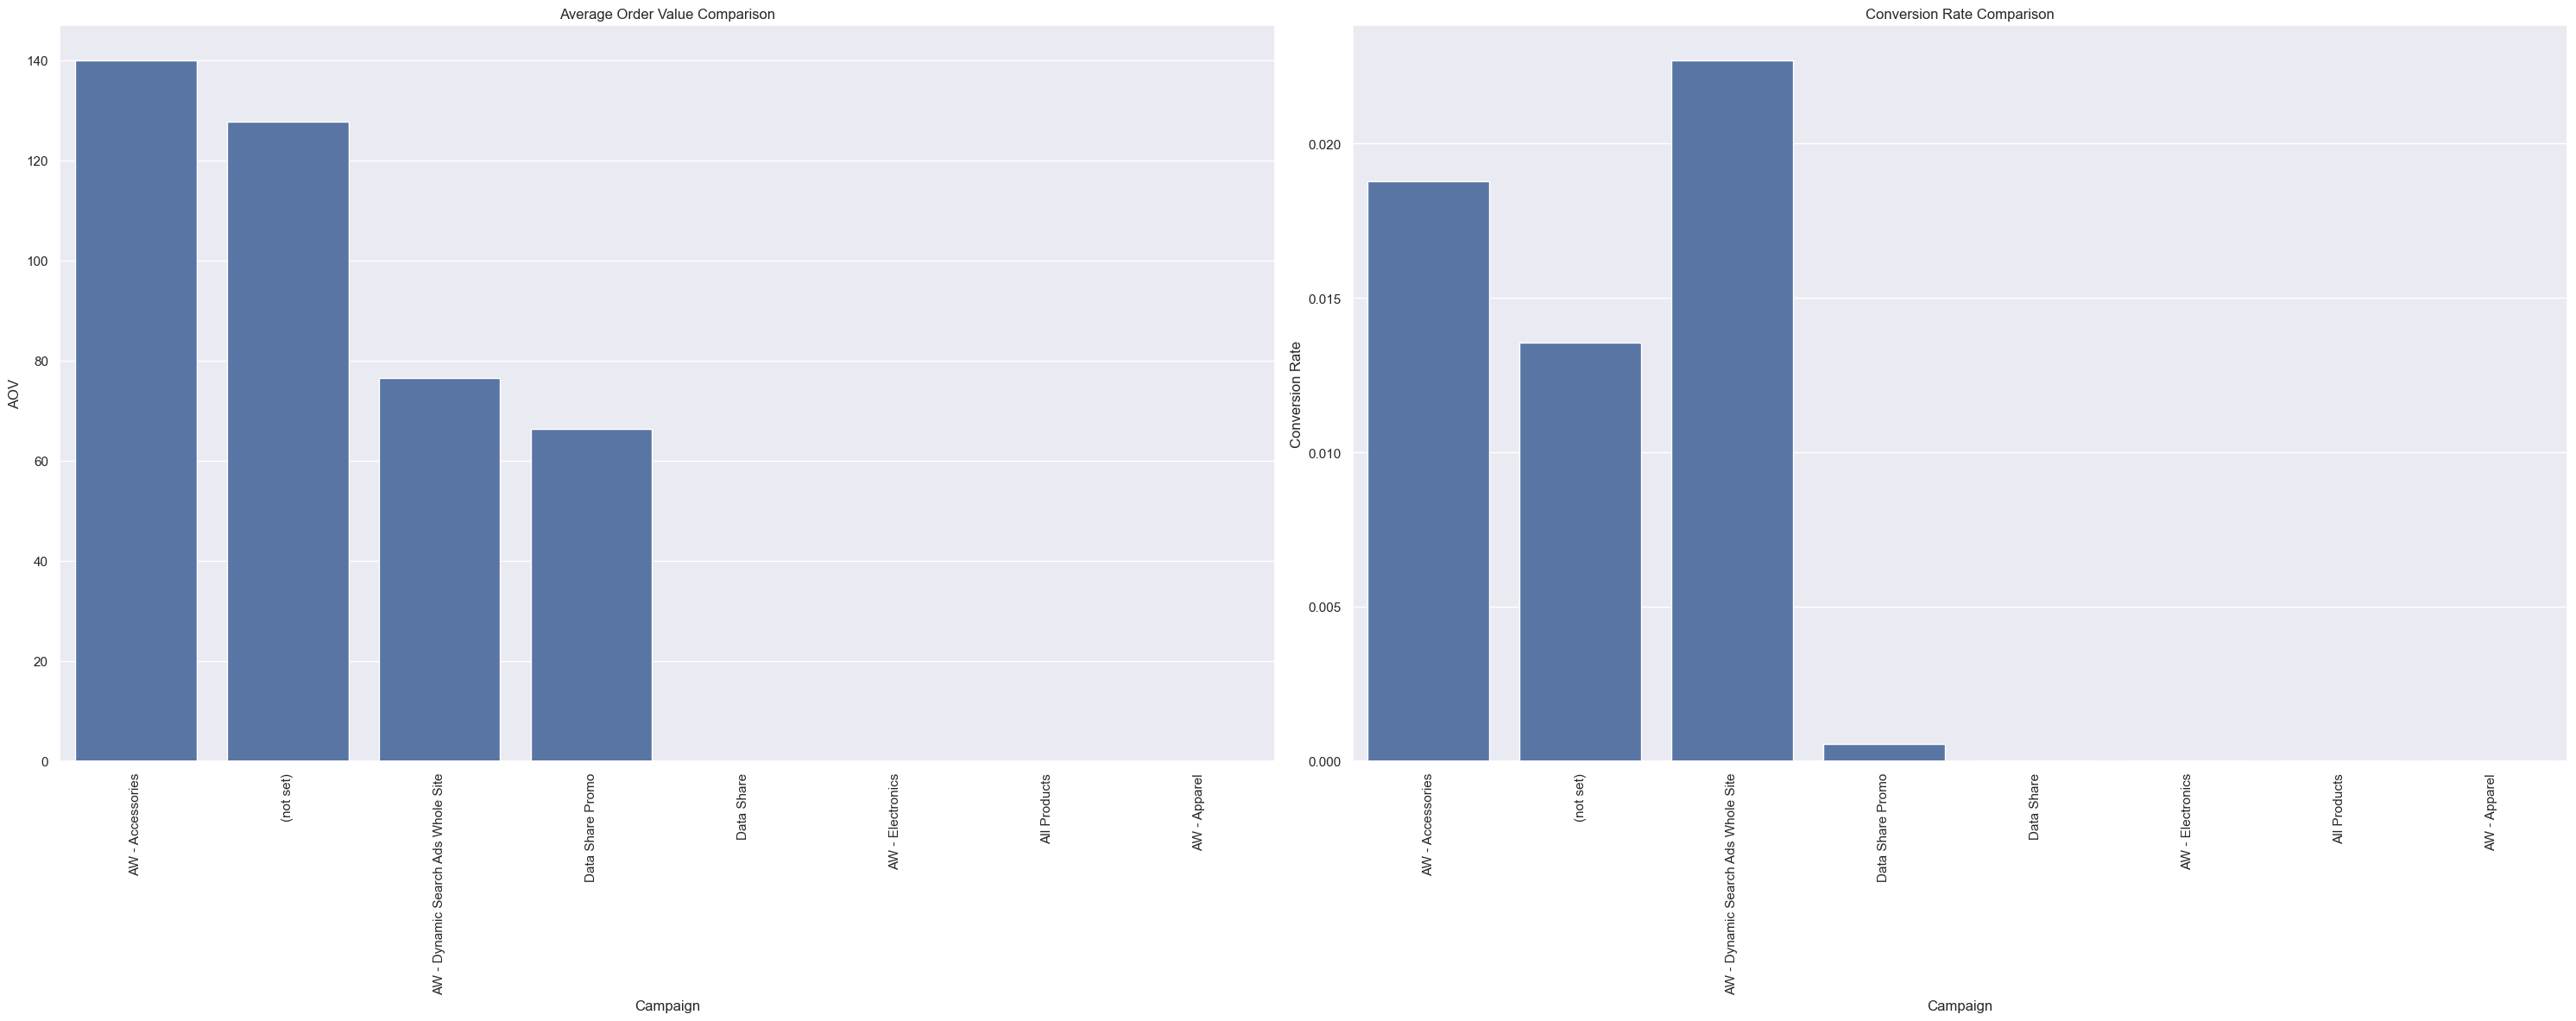

In [5]:
fig, axes = plt.subplots(1,2)
fig.set_figwidth(30)
fig.set_figheight(12)

sns.barplot(ax = axes[0], x='campaign', y='avg_order_value', data=result)
axes[0].set_title("Average Order Value Comparison")
axes[0].set_xlabel("Campaign")
axes[0].set_ylabel("AOV")

sns.barplot(ax = axes[1], x='campaign', y='conversion_rate', data=result)
axes[1].set_title("Conversion Rate Comparison")
axes[1].set_xlabel("Campaign")
axes[1].set_ylabel("Conversion Rate")

for a in axes:
  for tick in a.get_xticklabels():
    tick.set_rotation(90)

plt.tight_layout()
plt.show()

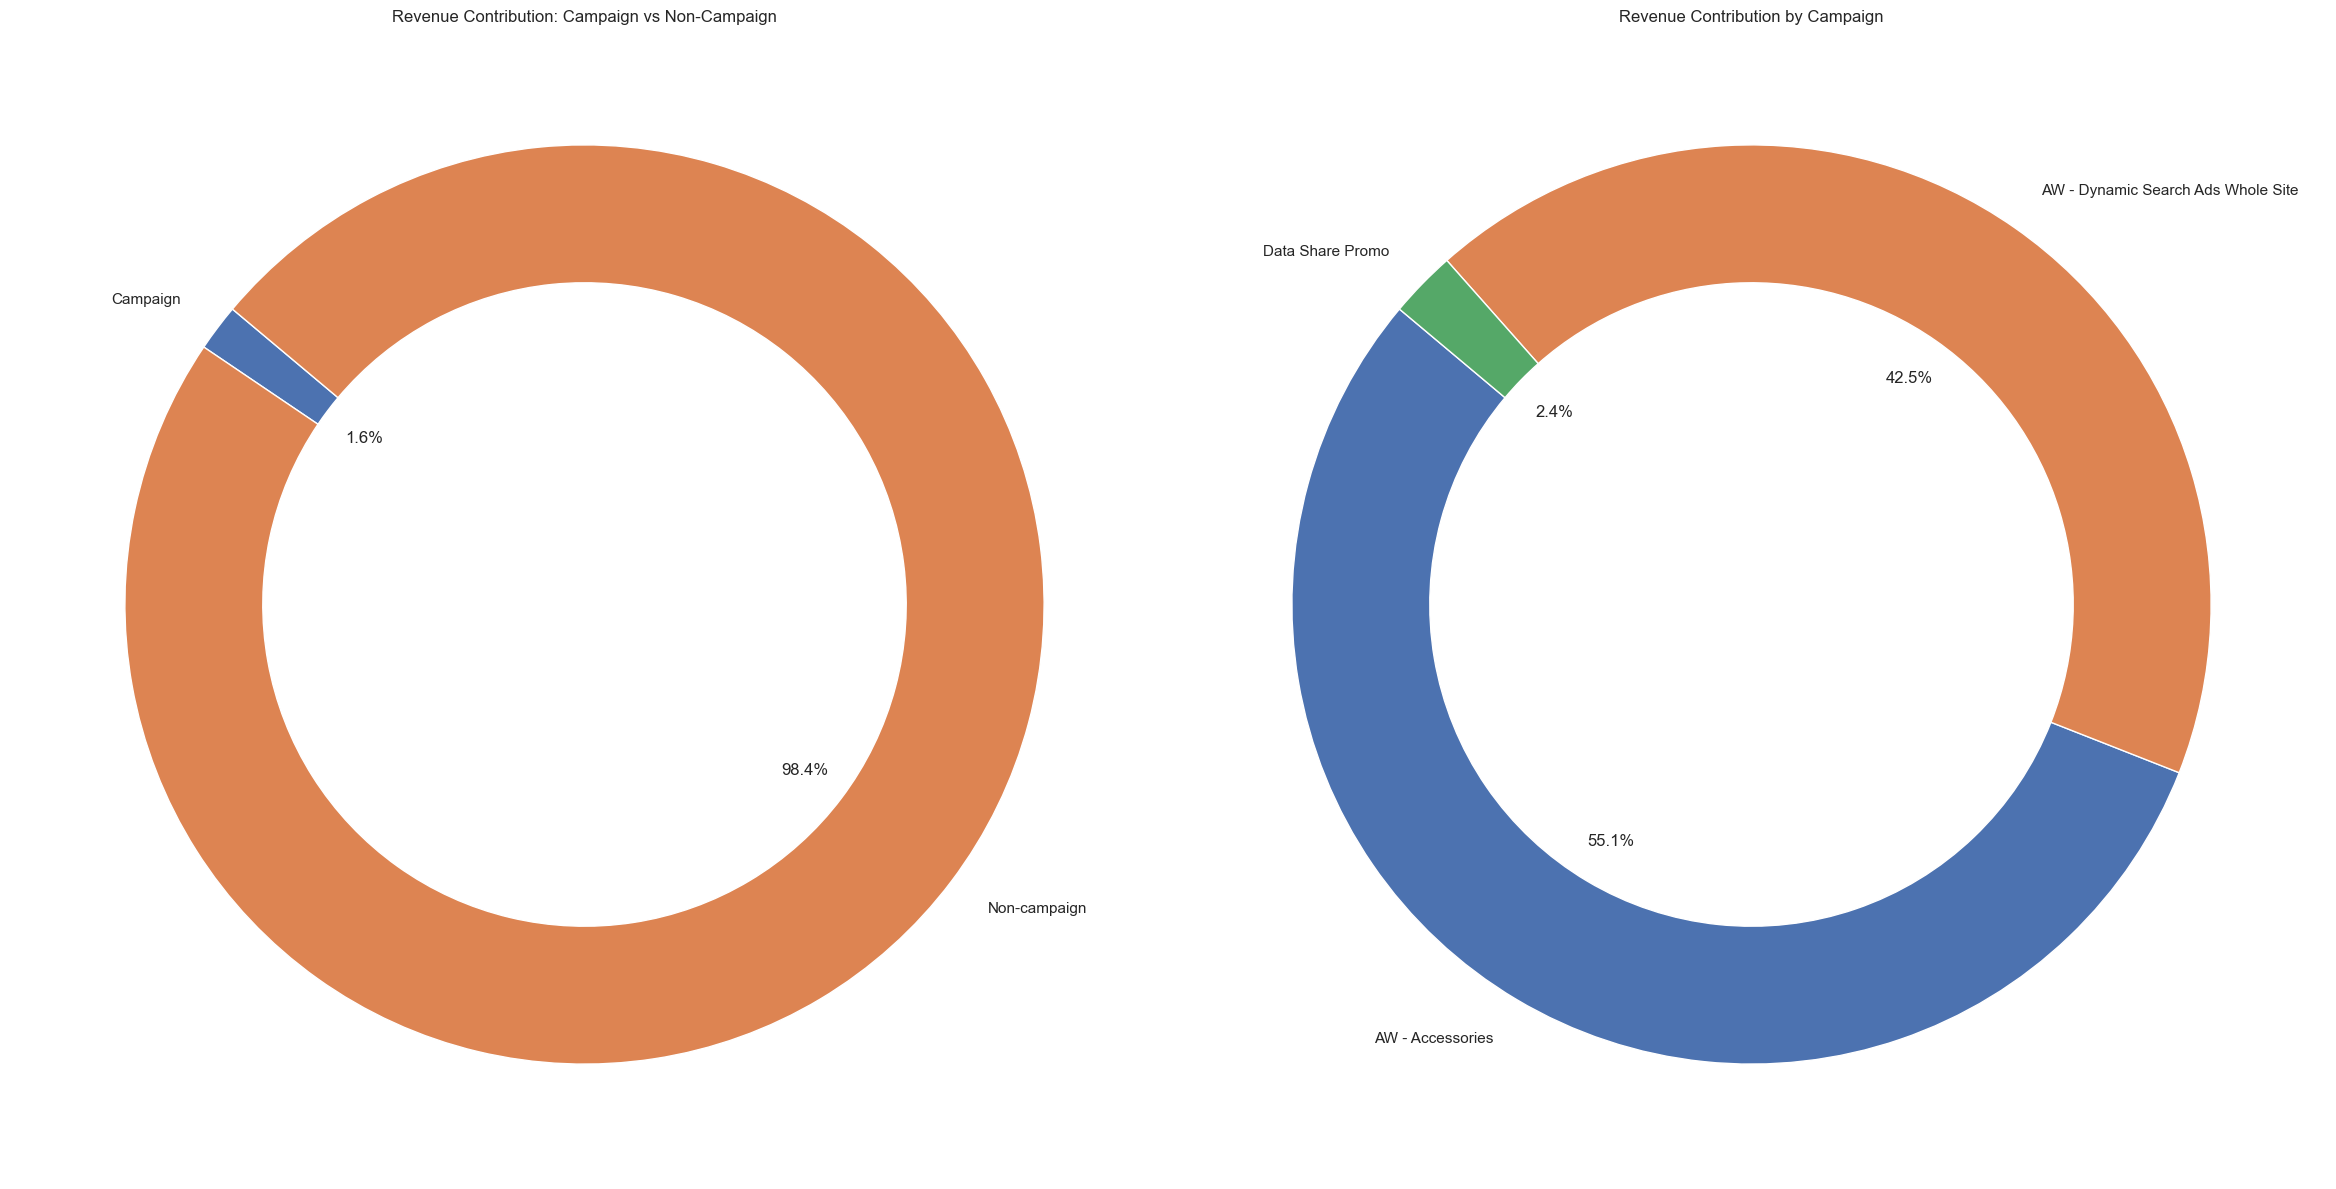

In [6]:
labels = ['Campaign', 'Non-campaign']
revenues = [result[result['campaign'] != '(not set)']['total_revenue'].sum(), result[result['campaign'] == '(not set)']['total_revenue'].sum()]

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (24, 16))


ax1.pie(revenues, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3})
ax1.set_title("Revenue Contribution: Campaign vs Non-Campaign")

new_res = result[result['campaign'] != '(not set)']
new_res = new_res[new_res['total_revenue'] > 0]
ax2.pie(new_res['total_revenue'], labels=new_res['campaign'], autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3})
ax2.set_title("Revenue Contribution by Campaign")

plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_23940\1551670225.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



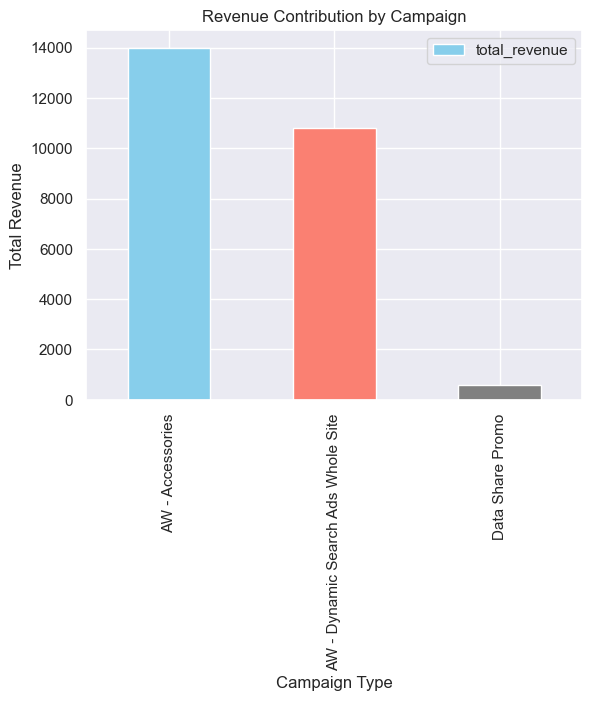

In [7]:
result[result['campaign'] != '(not set)'][result['total_revenue'] > 0].plot(kind='bar', x='campaign', y='total_revenue', stacked=True, color=['skyblue', 'salmon', 'grey'])
plt.title("Revenue Contribution by Campaign")
plt.xlabel("Campaign Type")
plt.ylabel("Total Revenue")
plt.show()

In [8]:
result = pd.read_parquet("campaign_distribution.parquet")
result

,campaign,pageviews,time_on_site
0,(not set),1,26
1,(not set),2,120
2,(not set),2,48
3,(not set),2,57
4,(not set),2,18
...,...,...,...
451864,(not set),15,165
451865,(not set),14,3602
451866,(not set),13,791
451867,(not set),15,277


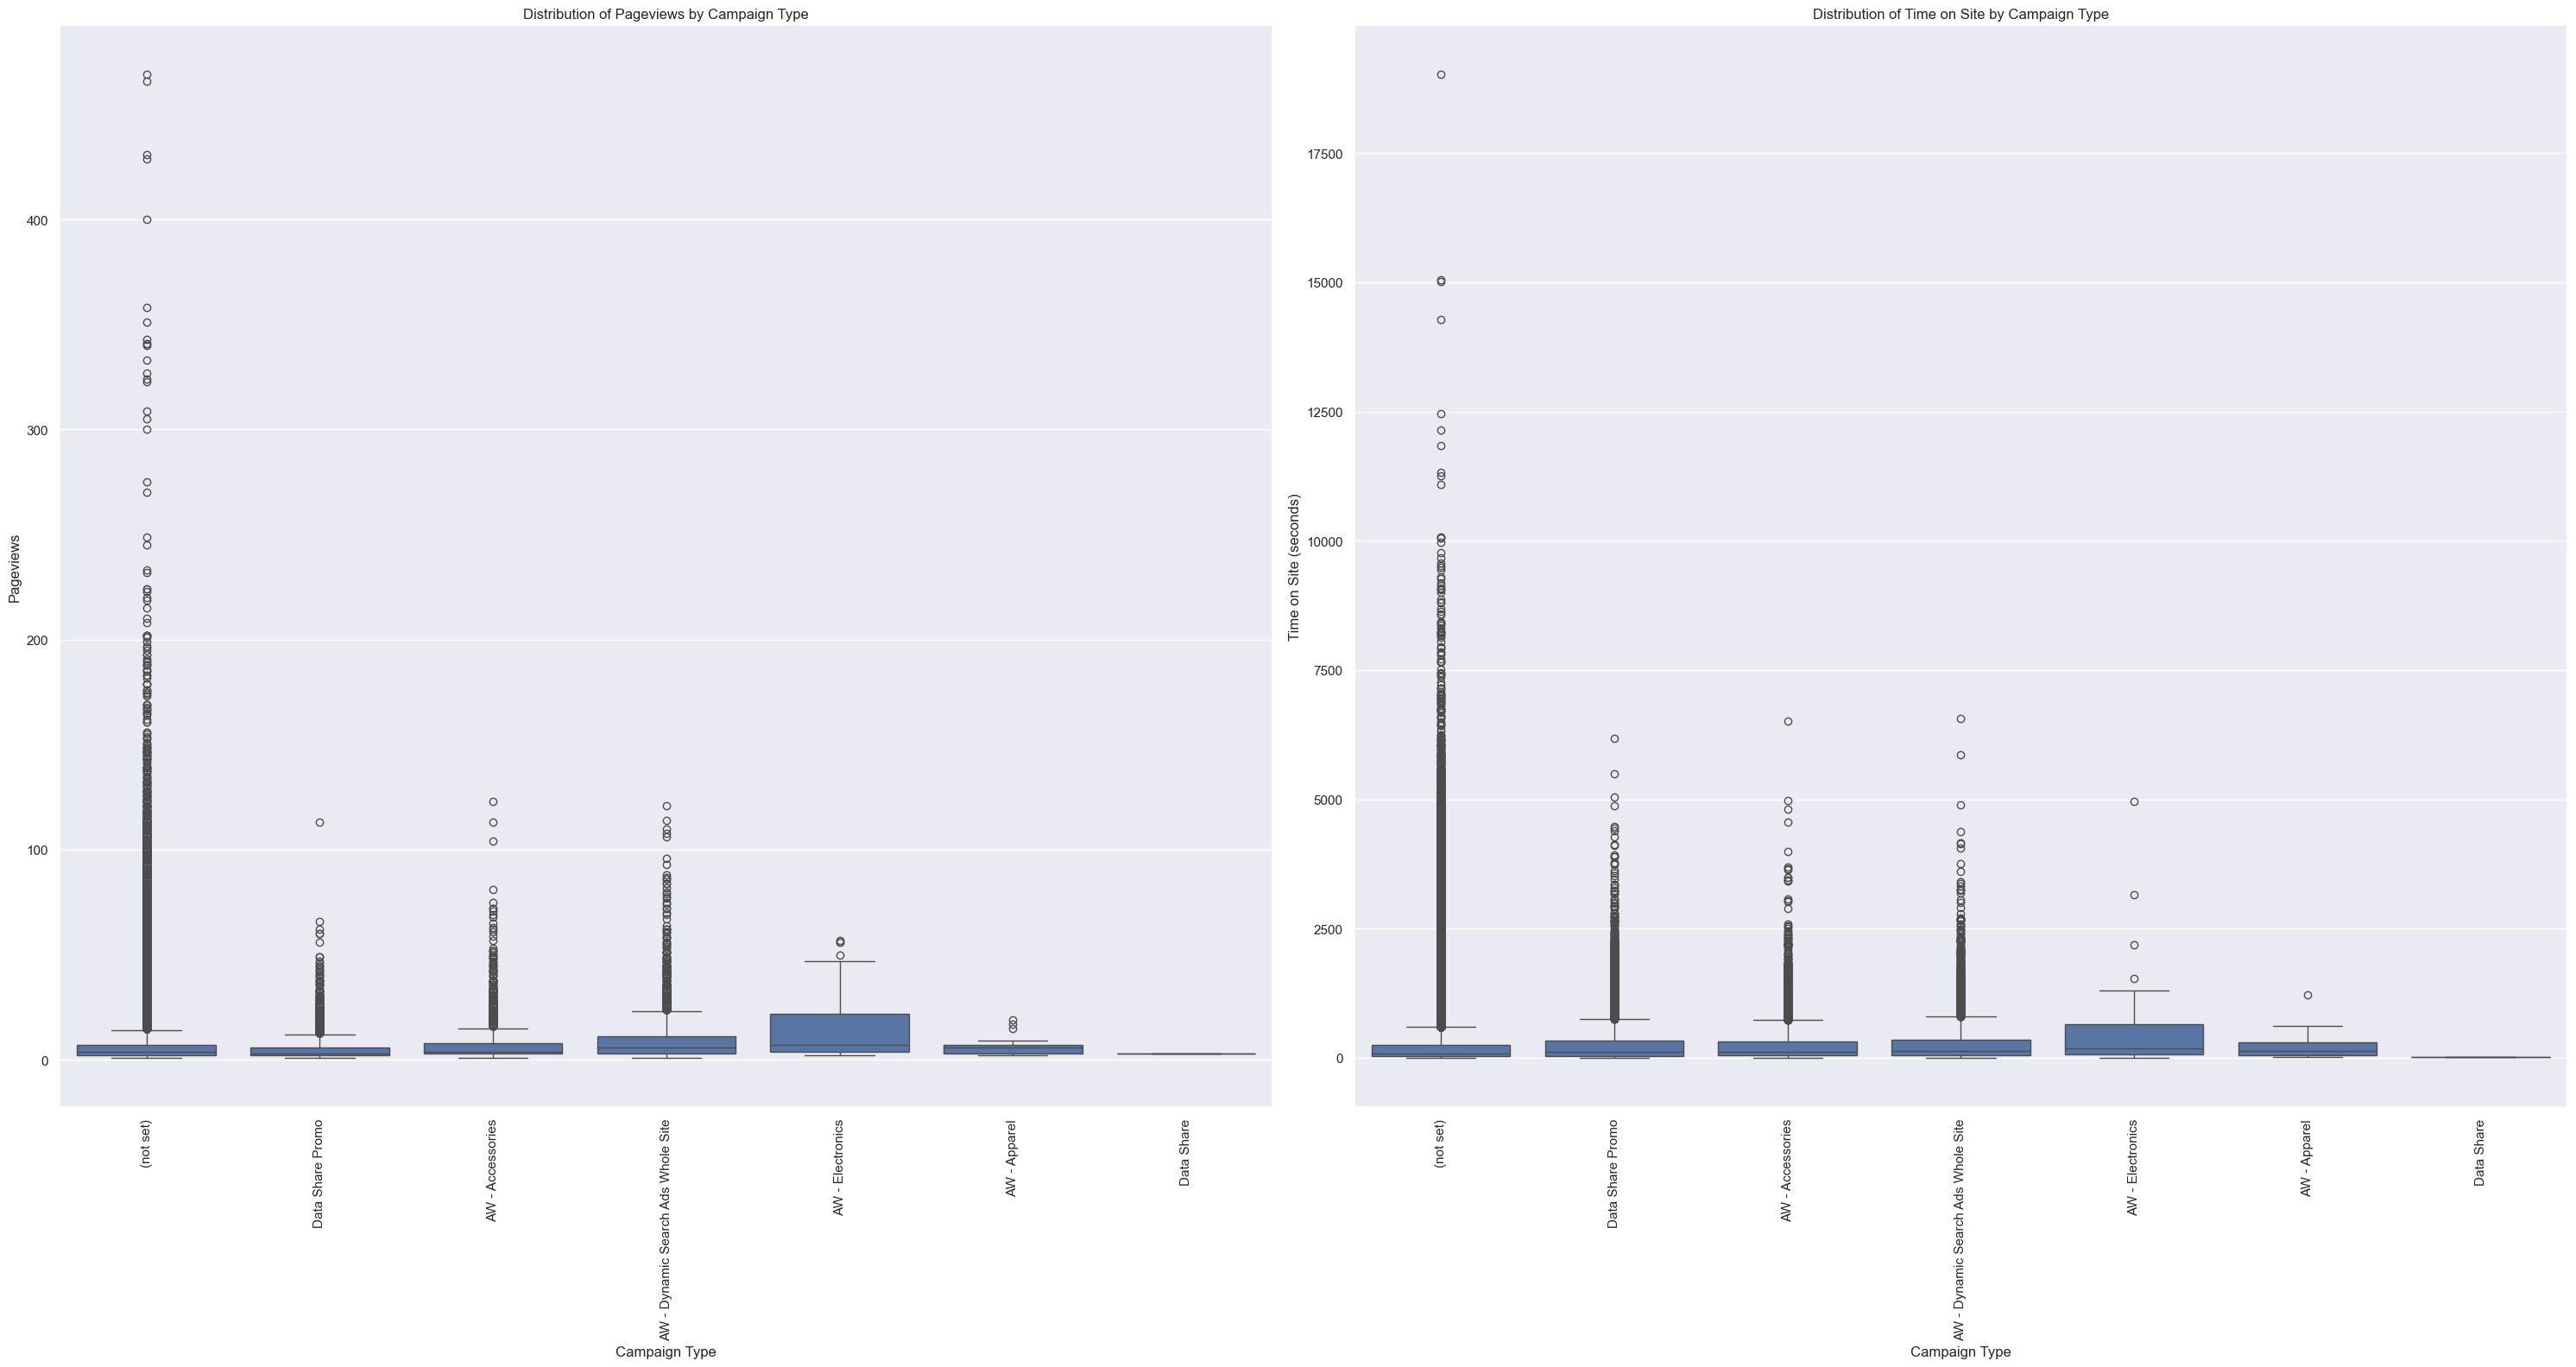

In [9]:
fig, axes = plt.subplots(1,2)
fig.set_figwidth(30)
fig.set_figheight(16)

ax = axes[0]
sns.boxplot(ax = ax, x='campaign', y='pageviews', data=result)
ax.set_title("Distribution of Pageviews by Campaign Type")
ax.set_xlabel("Campaign Type")
ax.set_ylabel("Pageviews")

# Box plot for Time on Site
ax = axes[1]
sns.boxplot(ax = ax, x='campaign', y='time_on_site', data=result)
ax.set_title("Distribution of Time on Site by Campaign Type")
ax.set_xlabel("Campaign Type")
ax.set_ylabel("Time on Site (seconds)")

for a in axes:
  for tick in a.get_xticklabels():
    tick.set_rotation(90)

plt.tight_layout()
plt.show()

In [10]:
res2 = pd.read_parquet('return_rate_by_campaign.parquet')
res2['date'] = res2['date'].dt.strftime('%Y-%m')
result = res2.groupby(['campaign', 'date'], as_index = False)['return_rate'].mean()

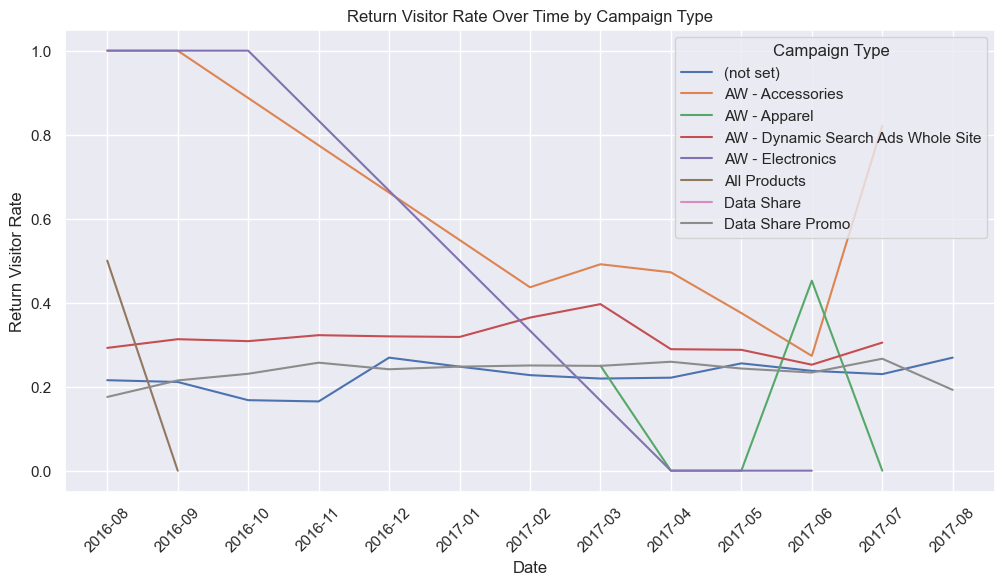

In [11]:
# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot line chart
sns.lineplot(data=result, x="date", y="return_rate", hue="campaign")

# Customize the plot
plt.title("Return Visitor Rate Over Time by Campaign Type")
plt.xlabel("Date")
plt.ylabel("Return Visitor Rate")
plt.legend(title="Campaign Type")
plt.xticks(rotation=45)
plt.show()

# New customers pulled in by campaigns

In [12]:
query = '''
WITH FirstVisit AS (
    SELECT
        fullVisitorId,
        MIN(PARSE_DATE('%Y%m%d', date)) AS first_visit_date
    FROM
        `bigquery-public-data.google_analytics_sample.ga_sessions_*`
    WHERE
      _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
    GROUP BY
        fullVisitorId
),

CustomerTypeByCampaign AS (
    SELECT
        t.fullVisitorId,
        t.trafficSource.campaign,
        IF(PARSE_DATE('%Y%m%d', t.date) = f.first_visit_date, 'New Customer', 'Returning Customer') AS customer_type
    FROM
        `bigquery-public-data.google_analytics_sample.ga_sessions_*` AS t, FirstVisit AS f
    WHERE
      _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
    AND
        t.fullVisitorId = f.fullVisitorId
)

SELECT
    campaign,
    customer_type,
    COUNT(DISTINCT fullVisitorId) AS customer_count
FROM
    CustomerTypeByCampaign
WHERE
    campaign IS NOT NULL
    AND campaign != "(not set)"
GROUP BY
    campaign, customer_type
ORDER BY
    customer_count DESC;
'''

result = client.query(query).result().to_dataframe()
result = result.pivot(index='campaign', columns='customer_type', values='customer_count').fillna(0)
result['ratio'] = np.where(
    result['Returning Customer'] == 0,
    0,  # or 0 or another placeholder if you prefer
    result['New Customer'] / result['Returning Customer']
)
result = result.sort_values(by='ratio', ascending=False)
result = result.reset_index()
result.columns = ['campaign', 'new_customers', 'returning_customers', 'ratio']
result

c:\Users\user\anaconda3\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning:

BigQuery Storage module not found, fetch data with the REST endpoint instead.



,campaign,new_customers,returning_customers,ratio
0,Data Share Promo,13048,1344,9.708333
1,AW - Apparel,27,3,9.000000
2,AW - Dynamic Search Ads Whole Site,4452,790,5.635443
3,AW - Accessories,3550,799,4.443054
4,AW - Electronics,29,12,2.416667
5,All Products,4,0,0.000000
6,Data Share,1,0,0.000000


# Channel Information

In [13]:
query = '''
WITH campaign_metrics AS (
    SELECT
        t.trafficSource.campaign,
        t.trafficSource.medium AS channel,
        COUNT(DISTINCT t.fullVisitorId) AS user_count,
        SUM(t.totals.transactionRevenue) / 1e6 AS total_revenue  -- Revenue in standard units
    FROM
        `bigquery-public-data.google_analytics_sample.ga_sessions_*` AS t
    WHERE
        _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
      AND
          t.trafficSource.campaign IS NOT NULL
      AND t.trafficSource.campaign != "(not set)"
    GROUP BY
        t.trafficSource.campaign, t.trafficSource.medium
    ORDER BY
        total_revenue DESC
),
    campaign_dates AS (
      SELECT
      trafficSource.campaign AS campaign,
      MIN(PARSE_DATE('%Y%m%d', date)) AS first_visit_date,
      MAX(PARSE_DATE('%Y%m%d', date)) AS last_visit_date
    FROM
      `bigquery-public-data.google_analytics_sample.ga_sessions_*`
    WHERE
      _TABLE_SUFFIX BETWEEN '20160801' AND '20170801'
    GROUP BY
      trafficSource.campaign
)

SELECT
    cm.campaign,
    cm.channel,
    cm.user_count,
    cm.total_revenue,
    cd.first_visit_date,
    cd.last_visit_date
FROM
    campaign_metrics AS cm, campaign_dates AS cd
    WHERE cm.campaign = cd.campaign
ORDER BY
    total_revenue DESC;
'''

result = client.query(query).result().to_dataframe()
result

c:\Users\user\anaconda3\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning:

BigQuery Storage module not found, fetch data with the REST endpoint instead.



,campaign,channel,user_count,total_revenue,first_visit_date,last_visit_date
0,AW - Accessories,cpc,4042,13997.55,2016-08-03,2017-07-31
1,AW - Dynamic Search Ads Whole Site,cpc,4921,10787.36,2016-08-02,2017-07-31
2,Data Share Promo,affiliate,13399,597.38,2016-08-01,2017-08-01
3,AW - Electronics,cpc,31,NaN,2016-08-01,2017-06-03
4,AW - Apparel,cpc,28,NaN,2017-03-08,2017-07-06
5,All Products,cpc,4,NaN,2016-08-01,2016-09-21
6,Data Share Promo,(not set),1,NaN,2016-08-01,2017-08-01
7,Data Share,affiliate,1,NaN,2017-02-15,2017-02-15
